<a href="https://colab.research.google.com/github/KhrystynaMarusenko/MatStatic/blob/main/MAIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from scipy import stats as st
from matplotlib import pyplot as plt
from random import*
import math
from collections import Counter
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import csv

#Дискретна вибірка
n=50;
##start=135;
##finish=153;
##a=[135,144,153,135,136,136,137,137,137,137,138,138,138,139,139,140,140,140,
##   140,141,141,142,142,142,143,143,143,143,144,144,144,144,144,145,145,146,
##   146,147,147,148,149,149,150,151,151,152,153,144,136,139]
start=10;
finish=28;
a=[13,14,15,13,13,13,13,13,21,13,18,18,18,13,19,14,10,14,
   10,11,11,12,12,12,13,28,13,25,14,14,24,14,24,15,15,16,
   16,17,14,14,19,19,15,15,15,15,13,14,16,19]

a.sort()
print(a,'\n')

freq_table=dict()
freq_table=Counter(a)



[10, 10, 11, 11, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 17, 18, 18, 18, 19, 19, 19, 19, 21, 24, 24, 25, 28] 



In [2]:

#Частотна таблиця
freq_tablel=dict()
for i in freq_table.keys():
    freq_tablel[i]=[freq_table[i]]
freq_table_df=pd.DataFrame(freq_tablel, index=["m:"])
print(freq_table_df)
print()
freq_tablel_2 = dict()
for i in freq_table.keys():
    freq_tablel_2[i]= float(freq_table[i]/n)
freq_table_df=pd.DataFrame(freq_tablel_2, index=["w:"])
print(freq_table_df)

x_axis=np.array(list(freq_table.keys()))
y_axis=np.array(list(freq_table.values()))
w_axis = []

    10  11  12  13  14  15  16  17  18  19  21  24  25  28
m:   2   2   3  11   9   7   3   1   3   4   1   2   1   1

      10    11    12    13    14    15  ...    18    19    21    24    25    28
w:  0.04  0.04  0.06  0.22  0.18  0.14  ...  0.06  0.08  0.02  0.04  0.02  0.02

[1 rows x 14 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


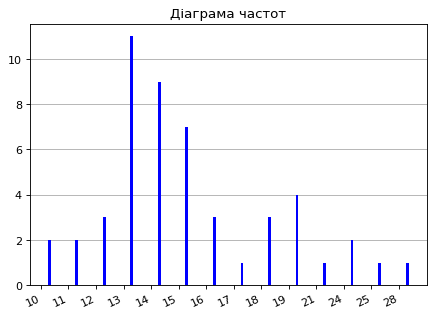

In [3]:
data_names = x_axis
data_values = y_axis

dpi = 80
fig = plt.figure(dpi = dpi, figsize = (512 / dpi, 384 / dpi) )
mpl.rcParams.update({'font.size': 10})

plt.title('Діаграма частот')

ax = plt.axes()
ax.yaxis.grid(True, zorder = 1)

xs = range(len(data_names))


plt.bar([x + 0.3 for x in xs], data_values,
        width = 0.1, color = 'blue', alpha = 1,
        zorder = 2)
plt.xticks(xs, data_names)

fig.autofmt_xdate(rotation = 25)

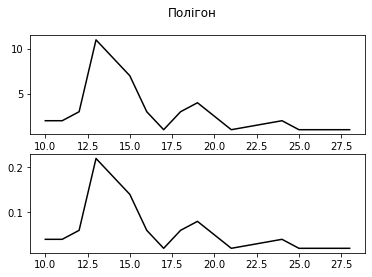

<Figure size 720x720 with 0 Axes>

In [4]:
fig, axs = plt.subplots(2)
fig.suptitle('Полігон')
plt.figure(figsize=(10,10))
for i in y_axis:
    w_axis.append(float(i/n))
s=[20*10 for n in range(len(x_axis))]
axs[0].plot(x_axis,y_axis,'k')
axs[1].plot(x_axis, w_axis,color='k')
plt.show()

In [5]:
print('об`єм:' +str(n))

об`єм:50


In [6]:
r = np.amax(a)-np.amin(a)
print('Розмах вибірки:'+str(r))

Розмах вибірки:18


In [7]:
z = np.multiply(x_axis,y_axis)
ans = sum(z)
x_mean=float(ans/n)
print("Середнє арифметичне всієї вибірки:"+str(x_mean))

Середнє арифметичне всієї вибірки:15.38


In [8]:
x_median=np.median(a)
print("Медіана для всієї вибірки:"+ str(x_median))

Медіана для всієї вибірки:14.0


In [9]:
mode_value=0;
mode=[]
for i in freq_table:
    if mode_value<freq_table[i]:
        mode_value=freq_table[i]
for i in freq_table:
    if mode_value==freq_table[i]:
        mode.append(i)
print("Мода для всієї вибірки: "+str(mode))

Мода для всієї вибірки: [13]


In [10]:
d = np.power(x_axis,2)
d_sum=np.multiply(d,y_axis)
dus=float(sum(d_sum)/n-pow(x_mean,2))
print("Статистична дисперсія для всієї вибірки: "+str(dus))

Статистична дисперсія для всієї вибірки: 14.395599999999973


In [11]:
ssv = float(math.sqrt(dus))
print("Середнє статистичне відхилення для всієї вибірки: "+str(ssv))

Середнє статистичне відхилення для всієї вибірки: 3.7941533970043926


In [12]:
v_dus = float(n*dus/(n-1))
print("Виправлена статистична дисперсія для всієї вибірки: "+str(v_dus))

Виправлена статистична дисперсія для всієї вибірки: 14.689387755102013


In [13]:
sl=abs(np.subtract(x_axis,x_mean))
slv = 1/n*sum(np.multiply(sl,y_axis))
print("Середнє лінійне відхилення для всієї вибірки: "+str(slv))

Середнє лінійне відхилення для всієї вибірки: 2.8368000000000007


In [14]:
Vp = slv/x_mean*100
print("Коефіцієнт варіації за середнім лінійним відхиленням: "+str(Vp) +'%')

Коефіцієнт варіації за середнім лінійним відхиленням: 18.44473342002601%


In [15]:
Vs = ssv/x_mean*100
print("Коефіцієнт варіації за середнім квадратичним відхиленням: "+str(Vs) +'%')

Коефіцієнт варіації за середнім квадратичним відхиленням: 24.66939789989852%


In [16]:
arr = [0,1,2,3,4]
x_s=dict()
ms = dict()
Ms = dict()
print("Початковий статистичний момент вибірки s-го порядку:\n")
for i in arr:
    
    x_s= pow(x_axis,i)
    ms = np.multiply(x_s,y_axis)    
    Ms[i] = float(1/n*sum(ms))
    print('M('+str(i)+'): '+str(Ms[i]))
print('\n')

print("Центральний статистичний момент вибірки s-го порядку:\n")
x_v =dict()
x_xv = dict()
mv = dict()
Mv = dict()
for i in arr:
    x_xv = np.subtract(x_axis,x_mean)
    x_v = pow(x_xv,i)
    ##print(x_v,'\n',y_axis,'\n')
    mv = np.multiply(x_v,y_axis)
    ##print(sum(mv),'\n')
    Mv[i] = float(1/n*sum(mv))
    print('M('+str(i)+'): '+str(Mv[i]))
print('\n')

Початковий статистичний момент вибірки s-го порядку:

M(0): 1.0
M(1): 15.38
M(2): 250.94
M(3): 4379.06
M(4): 82108.7


Центральний статистичний момент вибірки s-го порядку:

M(0): 1.0
M(1): -7.105427357601002e-16
M(2): 14.3956
M(3): 76.79414399999997
M(4): 999.8797019199998




In [17]:
A = float(1/n*sum(np.multiply(pow(np.subtract(x_axis,x_mean),3),y_axis))/(pow(ssv,3)))
print('Асиметрія: ', str(A))

E = float(1/n*sum(np.multiply(pow(np.subtract(x_axis,x_mean),4),y_axis))/(pow(ssv,4)))-3
print('Ексцес: ', str(E))

Асиметрія:  1.4059939364353202
Ексцес:  1.8248988218010274


In [26]:
#Неперервна вибірка

print("  ")
print("  ")

rv = math.floor(math.log2(n))
dx=(max(a)-min(a))/r

groups=[]
b=a[0]

for i in range(rv):
    groups.append((float(format(b,'.4f')),float(format(b+dx,'.4f'))))
    b+=dx
print(groups,'\n')

freq_table=dict()

for i in a:
    for j in groups:
        if j[0]<=i<j[1] and freq_table.get(j):
            freq_table[j]+=1
        elif j[0]<=i<j[1] and not freq_table.get(j):
            freq_table[j]=1
#freq_table[groups[r-1]]+=1
freq_table



  
  
[(10.0, 11.0), (11.0, 12.0), (12.0, 13.0), (13.0, 14.0), (14.0, 15.0)] 



{(10.0, 11.0): 2,
 (11.0, 12.0): 2,
 (12.0, 13.0): 3,
 (13.0, 14.0): 11,
 (14.0, 15.0): 9}

In [19]:

#Частотна
freq_tablel=dict()
for i in freq_table.keys():
    freq_tablel[i]=[freq_table[i]]
freq_table_df=pd.DataFrame(freq_tablel, index=["m:"])
print(freq_table_df)
print('\n')
#Відносна частотна
freq_tablel_2 = dict()
for i in freq_table.keys():
    freq_tablel_2[i]= float(freq_table[i]/n)
freq_table_df=pd.DataFrame(freq_tablel_2, index=["w:"])
print(freq_table_df)

   10.0 11.0 12.0 13.0 14.0
   11.0 12.0 13.0 14.0 15.0
m:    2    2    3   11    9


    10.0  11.0  12.0  13.0  14.0
    11.0  12.0  13.0  14.0  15.0
w:  0.04  0.04  0.06  0.22  0.18


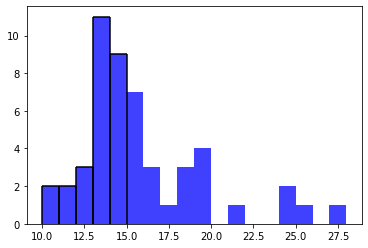

In [20]:
plt.hist(a,r,facecolor='b',alpha=0.75)
y_axis=[i for i in freq_table.values()]
for i in freq_table:
    plt.vlines(i[0],ymin=0,ymax=freq_table[i],linestyle='-',color='k')
    plt.vlines(i[1],ymin=0,ymax=freq_table[i],linestyle='-',color='k')
    plt.hlines(xmin=i[0],xmax=i[1], y=freq_table[i],color='k')
plt.show()